In [2]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [2]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [3]:
# Pip install method (recommended)
!pip install ultralytics --quiet

from IPython import display
display.clear_output()

import ultralytics
#ultralytics.checks().gpu()

import torch
if torch.cuda.is_available():
    print("GPU is available!")
    print(f"GPU device name: {torch.cuda.get_device_name(0)}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
else:
    print("GPU is not available.")
    


GPU is available!
GPU device name: Tesla T4
Number of GPUs: 1


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [44]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8x.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
Ultralytics YOLOv8.0.61 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 69.4ms
Speed: 0.6ms preprocess, 69.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


In [7]:
%cd {HOME}
!mkdir datasets
%cd datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="API KEY")
# project = rf.workspace("kinqs-radio").project("knifedetections")
# dataset = project.version(2).download("yolov8")

project = rf.workspace("crime-detection").project("guns_n_knives-h4bky")
dataset = project.version(1).download("yolov8")


/content
/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 5.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.61, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to knifedetections-2 in yolov8:: 100%|██████████| 56/56 [00:00<00:00, 2382.04it/s]


In [129]:
%cd {HOME}

#{dataset.location}/data.yaml
#{HOME}/model/best.pt

# Custom Training
!yolo task=detect mode=train model=best.pt data={dataset.location}/data.yaml epochs=10000 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.61 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/runs/detect/train13/weights/best.pt, data=/content/datasets/knifedetections-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=tor

In [133]:
!ls {HOME}/runs/detect/train/

args.yaml					     results.csv
confusion_matrix.png				     results.png
events.out.tfevents.1680525935.6ae8bb1fb840.43796.0  train_batch0.jpg
F1_curve.png					     train_batch1.jpg
labels_correlogram.jpg				     train_batch2.jpg
labels.jpg					     val_batch0_labels.jpg
P_curve.png					     val_batch0_pred.jpg
PR_curve.png					     weights
R_curve.png


/content


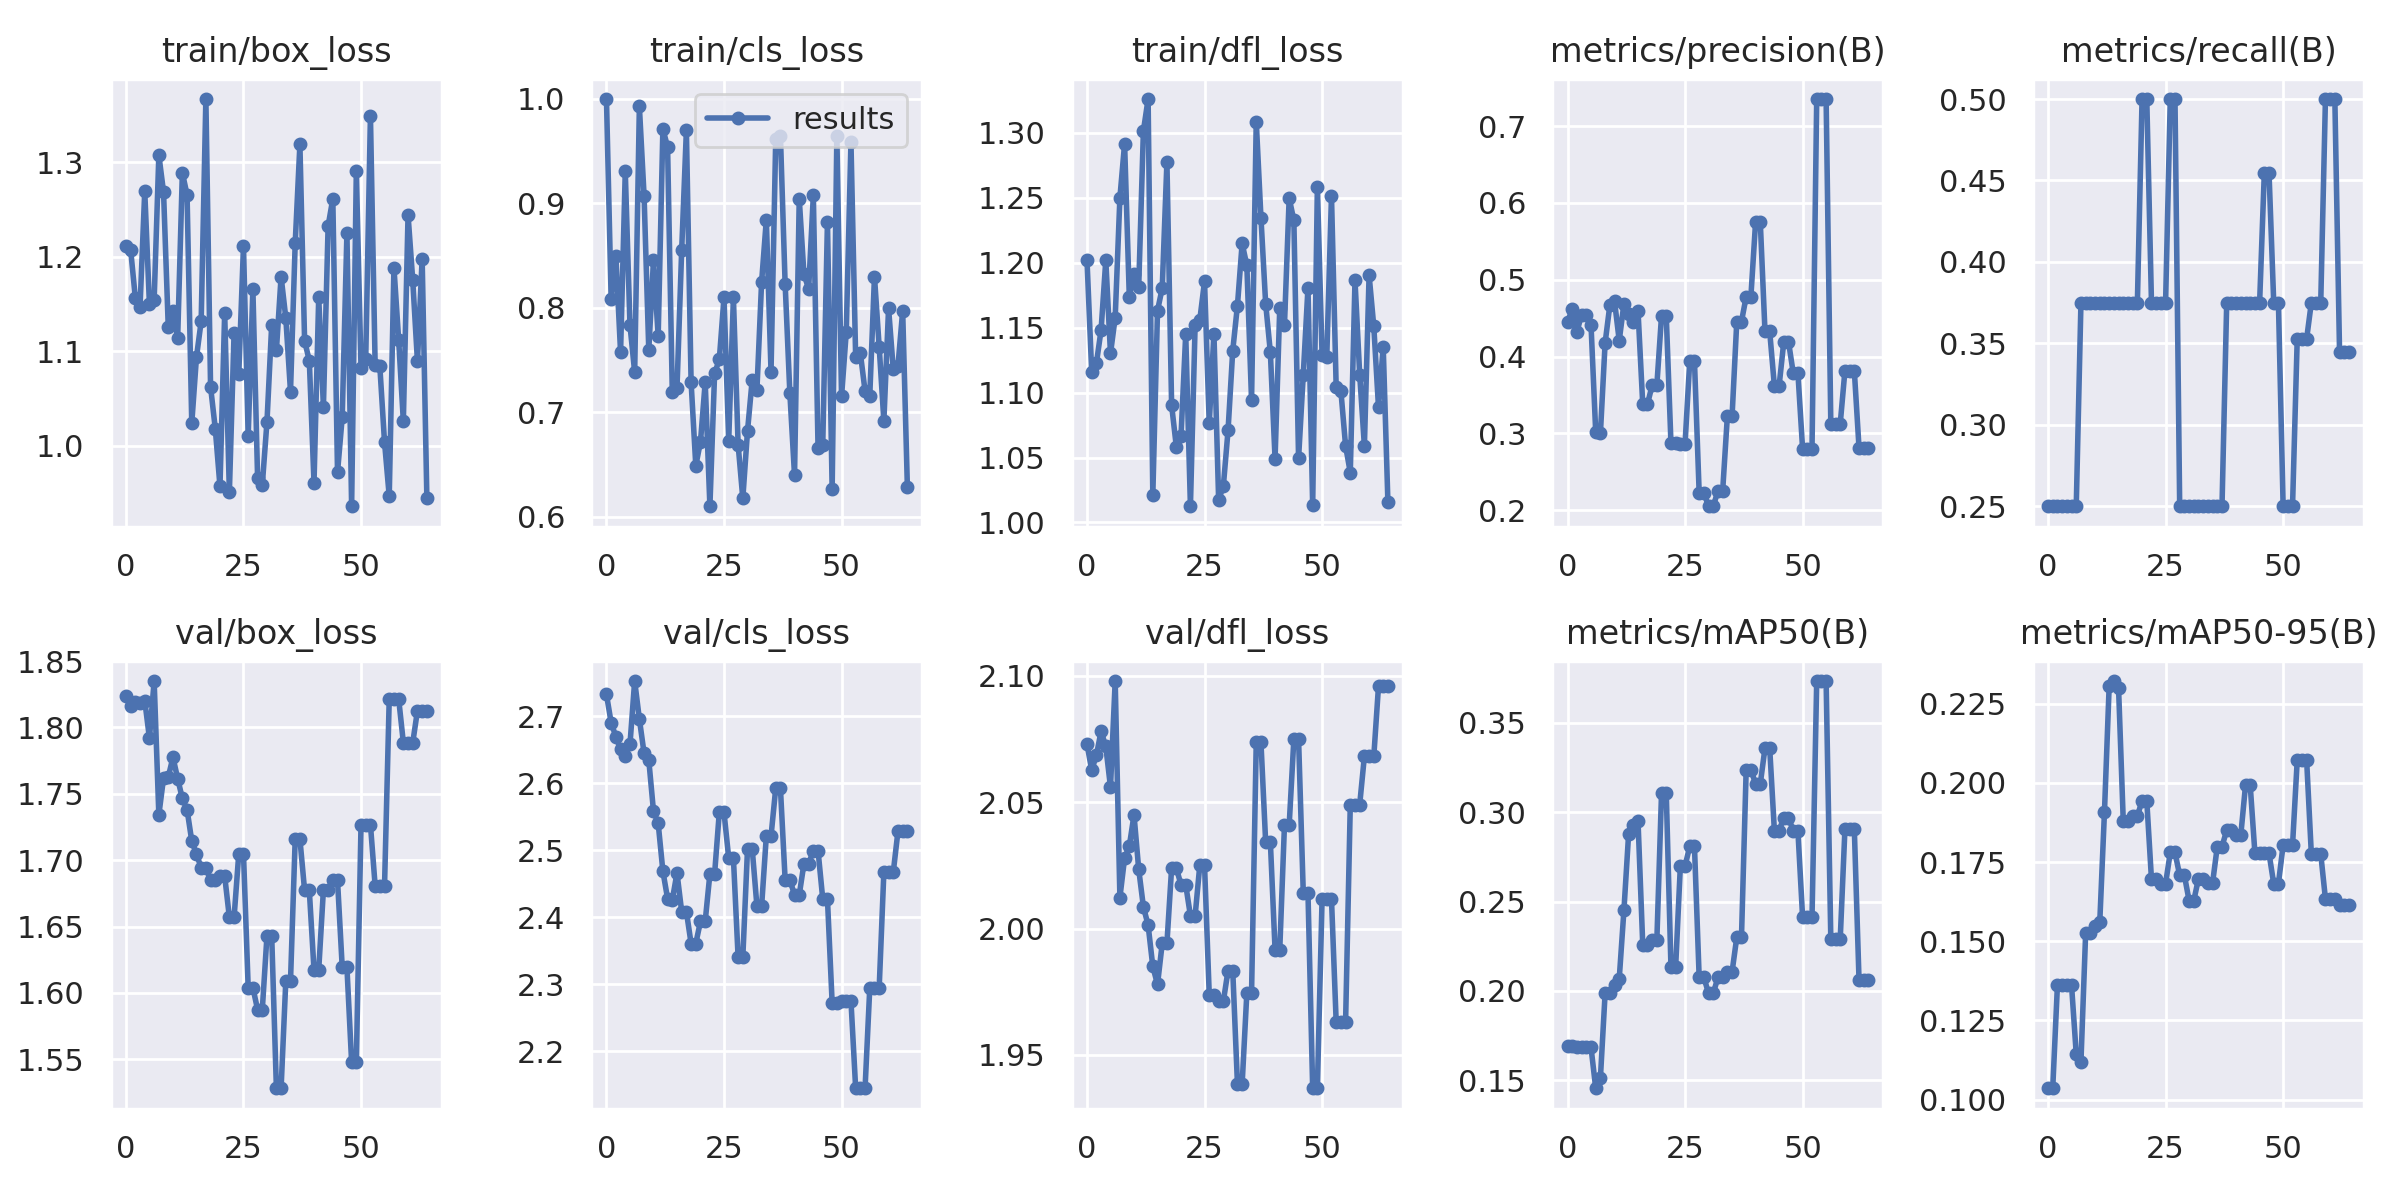

In [108]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


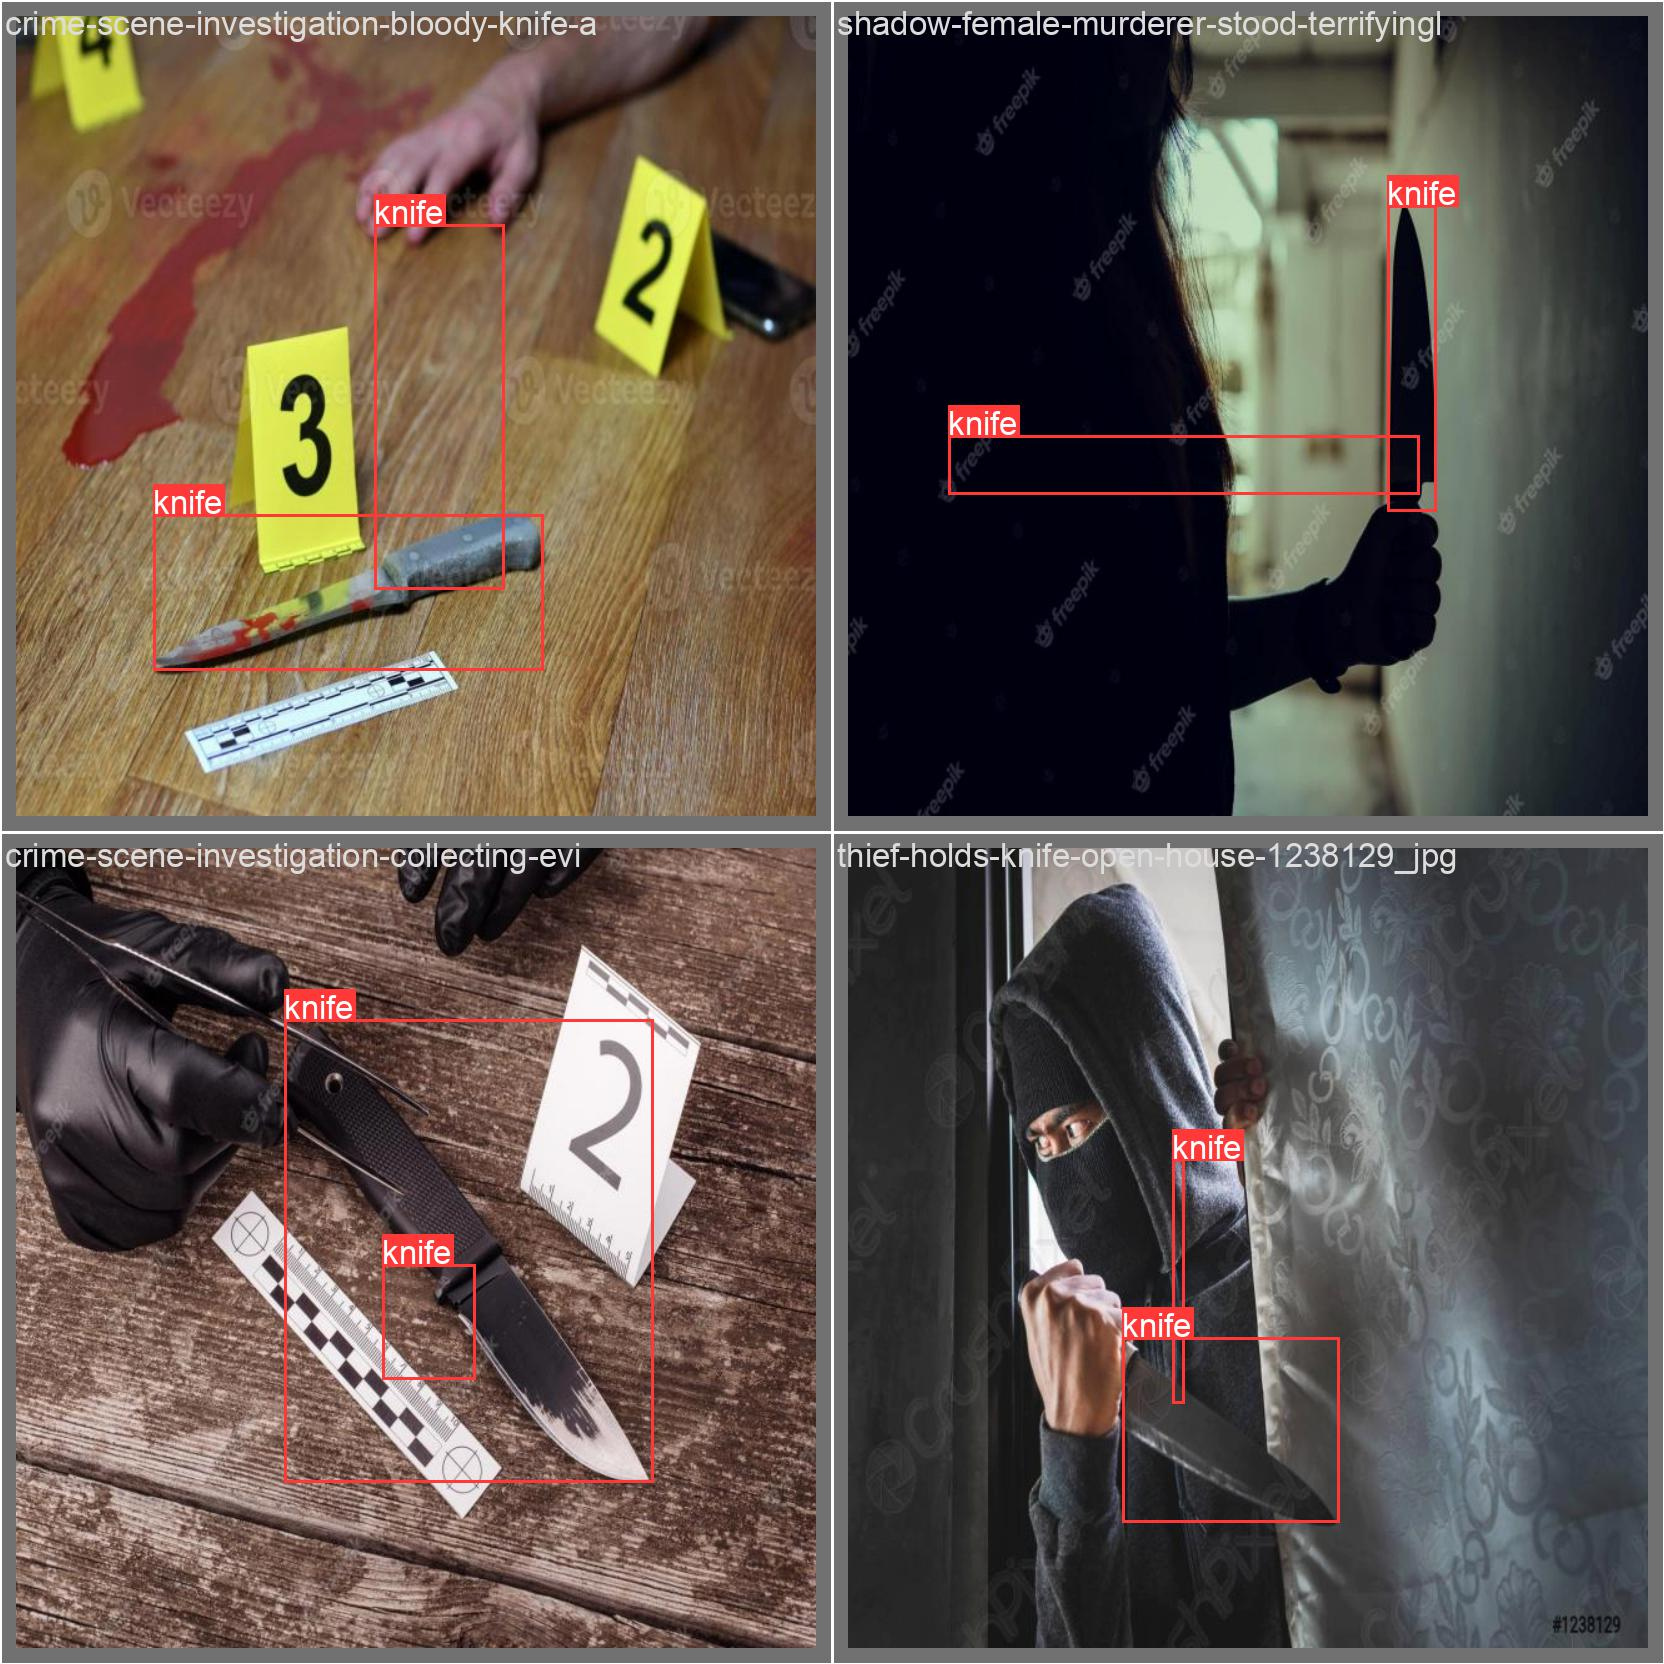

In [138]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

In [ ]:
%cd {HOME}
URL = 'https://firedoor.com.au/wp-content/uploads/2021/02/firedoor-knives.jpg'
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.40 source={URL} save=True

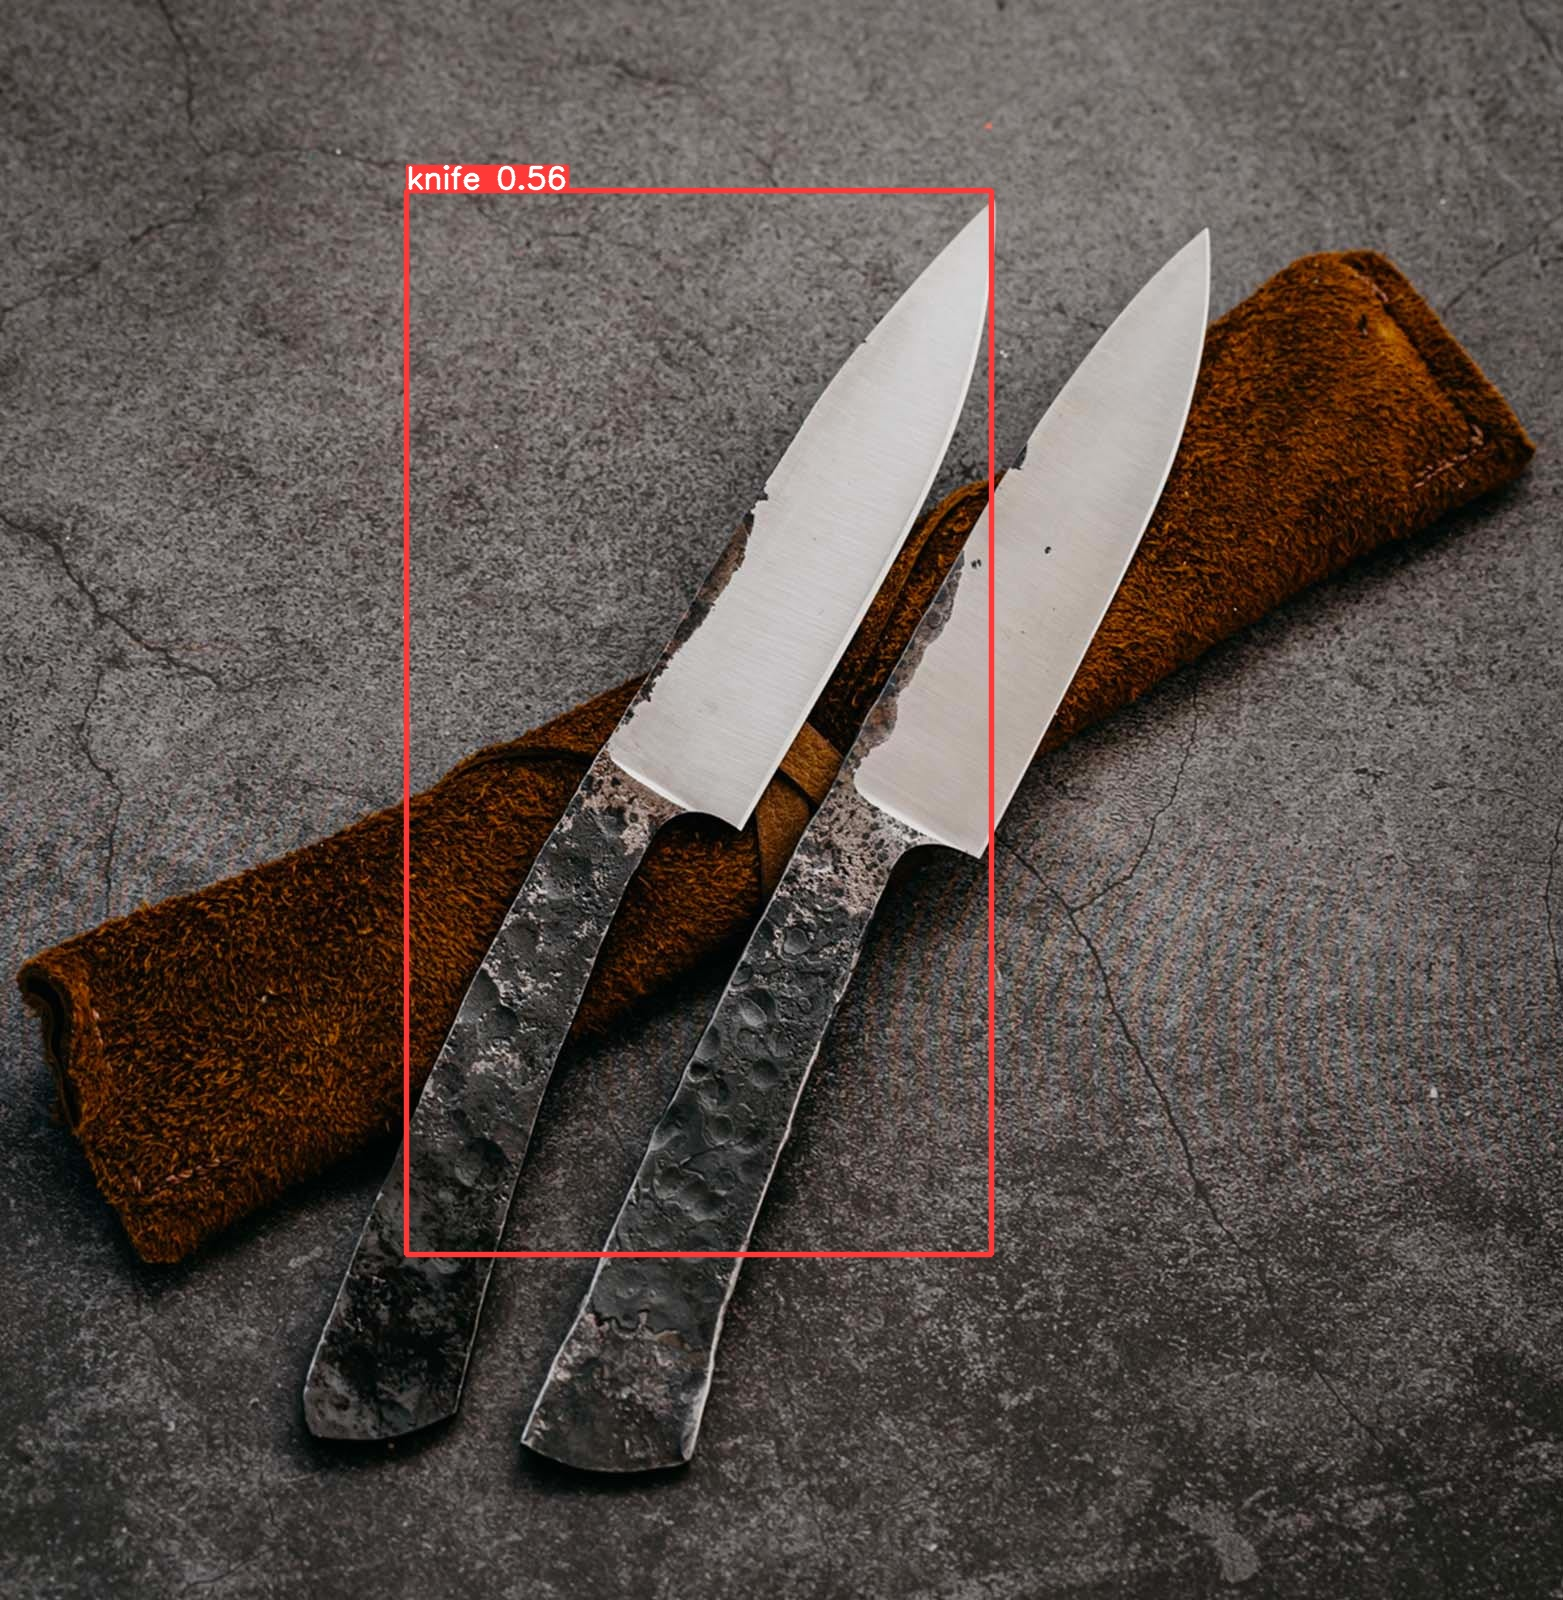

In [258]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:50]:
      display(Image(filename=image_path, width=600))
      print("\n")